<a href="https://colab.research.google.com/github/Msalamaumd/Extracting_Text_OCR_Archive/blob/main/Lynching_%26_Press_Salama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step1_extraction(keyword)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df_1 = pd.read_csv('/content/articles_oct_19.csv')

In [ ]:
def filter_rows_by_keywords (file_path, sentence, keywords):
    df_1 = pd.read_csv(file_path)

    condition = df_1[sentence].str.contains('|'.join(keywords), case=False, na=False)

    filtered_df_1 = df_1[condition]

    return filtered_df_1

In [ ]:
file_path = ('/content/articles_oct_19.csv')

In [ ]:
sentence = 'sentence'

In [ ]:
keywords = ['sheriff', 'Sheriff', 'Sheriffs','SHERIFF', 'police', 'Police', 'POLICE',  'policeman', 'Policeman', 'POLICEMAN', 'policemen', 'Policemen', 'POLICEMEN', 'officer', 'officers', 'Officer', 'OFFICER', 'OFFICERS', 'lawman', 'lawmen','LAWMAN', 'LAWMEN']

In [ ]:
filtered_rows = filter_rows_by_keywords(file_path, sentence, keywords)

In [ ]:
output_file_path_1 = '/content/law_enforcement_articles_1.csv'
filtered_rows.to_csv(output_file_path_1, index=False)

print(f"Filtered data saved to {output_file_path_1}")

Filtered data saved to /content/law_enforcement_articles_1.csv


In [ ]:
#step2_ extraction(filename) [ now I am having all related stories together but still splitted]

In [ ]:
law_enforcement_df = pd.read_csv('/content/law_enforcement_articles_1.csv')

In [ ]:
law_enforcement_filenames = law_enforcement_df['filename'].unique()

In [ ]:
original_articles_df = pd.read_csv('/content/articles_oct_19.csv')

In [ ]:
matching_articles_df = original_articles_df[original_articles_df['filename'].isin(law_enforcement_filenames)]

In [ ]:
output_file_path_2 = '/content/full-lawenforcement_2.csv'
matching_articles_df.to_csv(output_file_path_2, index=False)

print(f"Matching articles saved to {output_file_path_2}")


Matching articles saved to /content/full-lawenforcement_2.csv


In [ ]:
#step3_aggregation with space [ Now, I will be aggregating them but adding a space so that the articles will not overlap]

In [ ]:
df_clean = pd.read_csv('/content/full-lawenforcement_2.csv')

In [ ]:
aggregation_functions = {'sentence': ' '.join}

In [ ]:
for column in df_clean.columns:
    if column != 'sentence' and column !='filename':
      aggregation_functions[column] = 'first'

In [ ]:
df_grouped = df_clean.groupby('filename').agg(aggregation_functions).reset_index()

In [ ]:
output_file_path_3 = '/content/full-lawenforcement_agg_3.csv'
df_grouped.to_csv(output_file_path_3, index=False)
print(f"Data saved to {output_file_path_3}")

Data saved to /content/full-lawenforcement_agg_3.csv


In [ ]:
#here, i am just trying to know thenumber of the stories that I have after aggregation

In [ ]:

df_clean = pd.read_csv('/content/full-lawenforcement_agg_3.csv')

num_rows = len(df_clean)

print(f"Number of rows in the DataFrame: {num_rows}")


Number of rows in the DataFrame: 1746


In [ ]:
#step4_count the length of the stories

In [ ]:
import pandas as pd

# Load the dataset
df_clean = pd.read_csv('/content/full-lawenforcement_agg_3.csv')

# Calculate the number of words in each 'sentence' and store it in a new column called 'articlewordcount'
df_clean['articlewordcount'] = df_clean['sentence'].str.split().apply(len)

# Display the DataFrame with the new 'articlewordcount' column
print(df_clean[['sentence', 'articlewordcount']])

# Specify the output file path
output_file_path_count = '/content/full-lawenforcement_agg_count.csv'

# Save the DataFrame with the new column to a CSV file
df_clean.to_csv(output_file_path_count, index=False)

# Print the save location
print(f"Data saved to {output_file_path_count}")


                                               sentence  articlewordcount
0     is Lynch Law- High- handed Measure. est FREDER...               169
1     FELLOW PRISONERS SANG. " God Be With You" Whil...               129
2     A colored man, named Thomas Harden, was killed...                62
3     Lynched. LITTLE ROCK, Ark., April 4.- Albert W...                33
4     A MOB OF LYNCHERS DE FEATED. PAOLA, KAN., Feb....               302
...                                                 ...               ...
1741  Officers Endeavor to Apprehend Rioters in Raid...               257
1742  A LYNCHING IN NEW YORK. The A Negro Brute Hang...               924
1743  a Murderous Feuds in New Mexico. SANTA FE, N. ...               110
1744  HANG KNIFE- WIELDING NEGRO. Mob Overpowers Gua...                74
1745  There was some talk of a lynching at East Peru...                28

[1746 rows x 2 columns]
Data saved to /content/full-lawenforcement_agg_count.csv


In [ ]:
pip install matplotlib seaborn


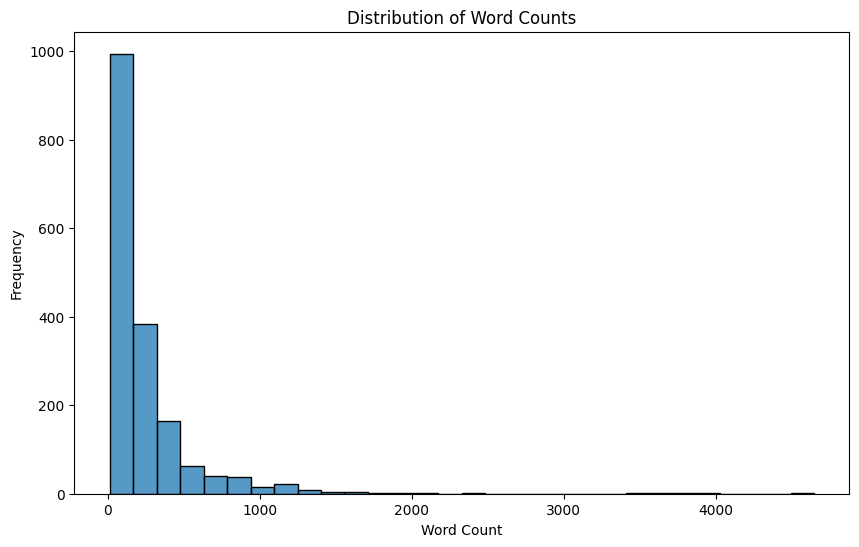

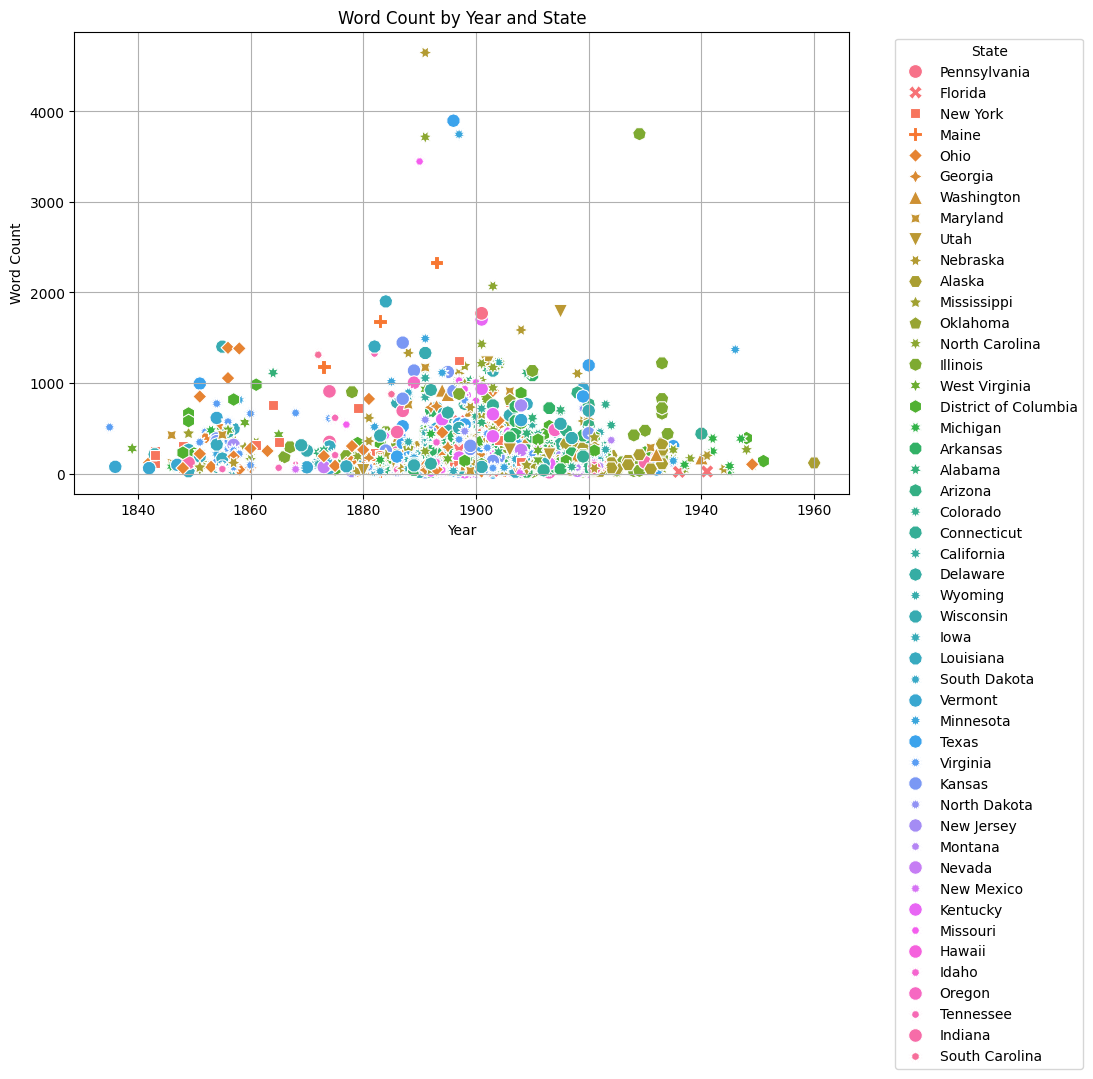

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_clean = pd.read_csv('/content/full-lawenforcement_agg_count.csv')

# Plotting the histogram of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['articlewordcount'], bins=30, kde=False)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# To visualize word counts by year and state
# Create a scatter plot for word count by year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='year', y='articlewordcount', hue='newspaper_state', style='newspaper_state', s=100)
plt.title('Word Count by Year and State')
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [ ]:
#Step 5: I need to break the stories in the sentence columns into sentences. However, I need a way to define a sentence. Each sentence should end with a full stop.

In [ ]:
#libararies
import nltk
from nltk.tokenize import sent_tokenize

In [ ]:
#model for tokenization

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
law_sentence_df = pd.read_csv('/content/full-lawenforcement_agg_3.csv')

In [ ]:
#function to split whole story into sentences
def split_into_sentences(text):
    return sent_tokenize(text)

In [ ]:
# apply the function to each row in my dataframe
law_sentence_df['sentence'] = law_sentence_df['sentence'].apply(split_into_sentences)

In [ ]:
#now, I will create a new row for each sentence while keeping the whole context using explode

df_exploded = law_sentence_df.explode('sentence')


In [ ]:
#I will export to see how the data was processed

output_file_path_4 = '/content/full-lawenforcement_split_sent_4.csv'

df_exploded.to_csv(output_file_path_4, index=False)
print(f"Data saved to {output_file_path_4}]")


Data saved to /content/full-lawenforcement_split_sent_4.csv]


In [ ]:
#Step 6 - After organizing the text into a complete story—since the original raw material was disorganized—I have aggregated the content. Next, I split the stories into sentences or lines. Now, I will select the sentences that include certain keywords for later analysis."

In [ ]:
keywords_police_new = ['sheriff', 'Sheriff', 'Sheriffs','SHERIFF', 'police', 'Police', 'POLICE',  'policeman', 'Policeman', 'POLICEMAN', 'policemen', 'Policemen', 'POLICEMEN', 'officer', 'officers', 'Officer', 'OFFICER', 'OFFICERS', 'lawman', 'lawmen','LAWMAN', 'LAWMEN']

In [ ]:
# create a boolean mask that will be True for sentences that include any of the above keywords

pattern_police = '|'.join(keywords_police_new)

mask = df_exploded['sentence'].str.contains(pattern_police, case=False, na =False)


In [ ]:
print("Regex pattern used for filtering:", pattern_police)

Regex pattern used for filtering: sheriff|Sheriff|Sheriffs|SHERIFF|police|Police|POLICE|policeman|Policeman|POLICEMAN|policemen|Policemen|POLICEMEN|officer|officers|Officer|OFFICER|OFFICERS|lawman|lawmen|LAWMAN|LAWMEN


In [ ]:
#then apply the mask on my dataframe

police_only_filtered_df = df_exploded[mask]


In [ ]:
print(police_only_filtered_df['sentence'].head())


0    A mob of two hundred men, including justices u...
1    He only asked Sheriff Tobin to be sure to fix ...
1    There were 250 witnesses to the hanging among ...
2    The police are in search of a negro named Wash...
3    LITTLE ROCK, Ark., April 4.- Albert Williams ,...
Name: sentence, dtype: object


In [ ]:
 #I will export to see how the data was processed

output_file_police_only = '/content/full-lawenforcement_police_only_sent_MAIN.csv'

police_only_filtered_df.to_csv(output_file_police_only, index=False)
print(f"Data saved to {output_file_police_only}]")


Data saved to /content/full-lawenforcement_police_only_sent_MAIN.csv]


In [ ]:

police_only_filtered_df = pd.read_csv('/content/full-lawenforcement_police_only_sent_MAIN.csv')

num_rows = len(police_only_filtered_df)

print(f"Number of rows in the DataFrame: {num_rows}")

Number of rows in the DataFrame: 3126


So, the total number of stories I have is **1746**, and after breaking down these stories into sentences and extracting
those that contain specific keywords for analysis, the total number of sentences is **3126**.

At this stage, I have data to analyze how the media portrayed law enforcement and to identify the frames used. I can also conduct topic modeling.

I can also see how this varied over time and by region.

However, before proceeding with more **dependency parsing**, I will first conduct **sentiment analysis** but perform **data cleaning** (first).

In [ ]:
#step 7 cleaning before sentiment analysis

In [ ]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#stop_words = set(stopwords.words('english'))


In [ ]:
#removing unnecessary characters and spaces

#def clean_text(text):
     #text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
     #text = text.strip()
    #return text

In [ ]:
#lowercasing
#def to_lower(text):
    #return text.lower()

In [ ]:
#remove stop words
#def remove_stop_word(text):
    #return ' '.join(word for word in text.split() if word not in stop_words)


In [ ]:
#then combining all functions before processing
#def full_cleaning(text):
    #text = clean_text(text)
    #text = to_lower(text)
    #text = remove_stop_word(text)
    #return text

In [ ]:
#read

#clean_police_df_1 = pd.read_csv('/content/full-lawenforcement_police_only_sent_MAIN.csv')

In [ ]:
#apply

#clean_police_df_1['sentence'] = clean_police_df_1['sentence'].apply(full_cleaning)

In [ ]:
#print(clean_police_df_1['sentence'].head())

In [ ]:
 #I will export to see how the data was processed
#output_file_police_only_clean = '/content/law_clean_New_MAIN.csv'
#clean_police_df_1.to_csv(output_file_police_only_clean, index=False)
#print(f"Data saved to {output_file_police_only_clean}")

In [ ]:
#Step 7 cleaning before parsing

In [ ]:
pip install pandas spacy

In [ ]:
 import spacy
 import re

In [ ]:
#spacymodel
nlp = spacy.load("en_core_web_sm")

In [ ]:
#setup for expanding contractions (don't = do not) - I know it is not practical but I tried to collect all contractions, all possible one but I might need to find a model

contractions_dict = {
    "don't": "do not",
    "isn't": "is not",
    "can't": "cannot",
    "won't": "will not",
    "didn't": "did not",
    "it's": "it is",
    "i'm": "I am",
    "she's": "she is",
    "he's": "he is",
    "that's": "that is",
    "there's": "there is",
    "what's": "what is",
    "where's": "where is",
    "how's": "how is",
    "let's": "let us",
    "you're": "you are",
    "we're": "we are",
    "they're": "they are",
    "i've": "I have",
    "you've": "you have",
    "we've": "we have",
    "they've": "they have",
    "should've": "should have",
    "could've": "could have",
    "might've": "might have",
    "must've": "must have",
    "you'll": "you will",
    "we'll": "we will",
    "he'll": "he will",
    "she'll": "she will",
    "it'll": "it will",
    "they'll": "they will",
    "ain't": "am not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "hasn't": "has not",
    "haven't": "have not",
    "hadn't": "had not",
    "doesn't": "does not",
    "don't": "do not",
    "wouldn't": "would not",
    "shouldn't": "should not",
    "mightn't": "might not",
    "mustn't": "must not",
    "can't've": "cannot have",
    "shouldn't've": "should not have",
    "would've": "would have",
    "could've": "could have",
    "might've": "might have",
    "i'd": "I would",
    "you'd": "you would",
    "he'd": "he would",
    "she'd": "she would",
    "we'd": "we would",
    "they'd": "they would",
    "i'd've": "I would have",
    "you'd've": "you would have",
    "he'd've": "he would have",
    "she'd've": "she would have",
    "we'd've": "we would have",
    "they'd've": "they would have"
}


In [ ]:
#then i will adding reg ( regular expression so that it can help with finding contrcations)

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))


In [ ]:
#functions for cleaning
#function for looking for contrcations

def expand_contractions(text, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)


In [ ]:
#then clean text function and here I process the text through Spacy to ensure the sentences are correctly formed

def clean_text(text):
    text = expand_contractions(text)
    doc = nlp(text)
    clean_text = ' '.join(sent.text.strip() for sent in doc.sents)
    return clean_text



In [ ]:
main_clean_df = pd.read_csv("/content/full-lawenforcement_police_only_sent_MAIN.csv")


In [ ]:
#applying functions
main_clean_df['cleaned_sentence'] = main_clean_df['sentence'].apply(clean_text)



In [ ]:
main_clean_df.to_csv("/content/clean_April10.csv", index=False)


In [ ]:
#step 8_parsing

In [ ]:
cleaned_data = pd.read_csv('/content/clean_April10.csv')

df = cleaned_data

In [ ]:
#Child_relation [1]
#function to relation
def find_keyword_adjective_relations(df, sentence, keywords_police_new):
    relations_1 = []
    for text in df[sentence]:
        if pd.isnull(text):
            continue
        doc = nlp(str(text))
        for token in doc:
            if token.text in keywords_police_new and token.pos_ == 'NOUN':
                for child in token.children:
                    if child.pos_ == 'ADJ':
                        relations_1.append((token.text, child.text))
    return pd.DataFrame(relations_1)


keywords_police_new = ['sheriff', 'Sheriff', 'Sheriffs','SHERIFF', 'police', 'Police', 'POLICE',  'policeman', 'Policeman', 'POLICEMAN', 'policemen', 'Policemen', 'POLICEMEN', 'officer', 'officers', 'Officer', 'OFFICER', 'OFFICERS', 'lawman', 'lawmen','LAWMAN', 'LAWMEN']

relations_1_df = find_keyword_adjective_relations(df, 'sentence', keywords_police_new)
relations_1_df



,0,1
0,officer,popular
1,officers,local
2,sheriff,dead
3,police,local
4,sheriff,present
...,...,...
137,officers,other
138,sheriff,wound
139,officers,Other
140,policeman,special


In [ ]:
# To save the DataFrame to a CSV file
relations_1_df.to_csv('relations_1_output.csv', index=False)


In [ ]:
#number of relations I got
number_of_relations_1_df = len(relations_1_df)
print("Number of relations found:", number_of_relations_1_df)


Number of relations found: 142


In [ ]:
#Child_relation [1] - extracting matching sentences
'''
def find_keyword_adjective_relations(df, sentence, keywords):
    # Create a list to store matching sentences
    matching_sentences = []
    # Iterate over non-null sentences
    for text in df[sentence].dropna():
        doc = nlp(str(text))
        found_relation = False
        for token in doc:
            if token.text in keywords_police_new and token.pos_ == 'NOUN':  # Check if the token is a keyword and a noun
                for child in token.children:
                    if child.dep_ == 'amod' and child.pos_ == 'ADJ':  # Check if the child is an adjective modifying the noun
                        matching_sentences.append(text)  # Add the sentence to the list
                        found_relation = True  # Mark that a relation was found
                        break  # Stop checking more children once a match is found
            if found_relation:
                break  # Stop processing the sentence further if a relation is found

    # Create a DataFrame from the list of matching sentences
    return pd.DataFrame(matching_sentences, columns=[sentence])

# List of keywords
keywords_police_new = ['sheriff', 'Sheriff', 'Sheriffs','SHERIFF', 'police', 'Police', 'POLICE',  'policeman', 'Policeman', 'POLICEMAN', 'policemen', 'Policemen', 'POLICEMEN', 'officer', 'officers', 'Officer', 'OFFICER', 'OFFICERS', 'lawman', 'lawmen','LAWMAN', 'LAWMEN']

# df
relations_df = find_keyword_adjective_relations(df, 'sentence', keywords_police_new)

# Export the DataFrame to a CSV file
relations_df.to_csv('sentences_with_relations.csv', index=False)



In [ ]:
from spacy import displacy

In [ ]:
#function to visualize
'''
def find_and_visualize_relations(df, sentence, keywords_police_new):
    docs_to_visualize = []
    for text in df[sentence]:
        if pd.isnull(text):
            continue
        doc = nlp(text)
        for token in doc:
            if token.text in keywords_police_new and token.pos_ == 'NOUN':
                for child in token.children:
                    if child.pos_ == 'ADJ':
                        docs_to_visualize.append(doc)
                        break

    return docs_to_visualize

df = cleaned_data
keywords_police_new = ['sheriff', 'Sheriff', 'Sheriffs','SHERIFF', 'police', 'Police', 'POLICE',  'policeman', 'Policeman', 'POLICEMAN', 'policemen', 'Policemen', 'POLICEMEN', 'officer', 'officers', 'Officer', 'OFFICER', 'OFFICERS', 'lawman', 'lawmen','LAWMAN', 'LAWMEN']

# tree
def visualize_dependency_trees(docs, num_trees=1):
    for doc in docs[:num_trees]:
        displacy.render(doc, style='dep', options={'distance': 100})


docs_to_visualize = find_and_visualize_relations(df, 'sentence', keywords_police_new)

# visualize
visualize_dependency_trees(docs_to_visualize, num_trees= 4)


In [ ]:
# direct & indirect relations

def find_keyword_adjective_relations(df, sentence, keywords_police_new):
    # Normalize keywords to lowercase
    #keywords = set(keyword.lower() for keyword in keywords_police_new)
    relations = []

    for text in df[sentence].dropna():
        #doc = nlp(text.lower())
        doc = nlp(text)
        for token in doc:
            if token.text in keywords_police_new and token.pos_ == 'NOUN':
                # Direct adjectival modifiers
                for child in token.children:
                    if child.dep_ == 'amod' and child.pos_ == 'ADJ':
                        relations.append({'noun': token.text, 'adjective': child.text, 'sentence': text})

                # Indirect relationships, via a shared parent
                if token.head.pos_ in ['NOUN', 'VERB']:
                    for sibling in token.head.children:
                        if sibling.dep_ == 'amod' and sibling.pos_ == 'ADJ' and sibling != token:
                            relations.append({'noun': token.text, 'adjective': sibling.text, 'sentence': text})

                # Adjectives connected via conjunction to the noun
                for possible_adj in token.conjuncts:
                    if possible_adj.pos_ == 'ADJ':
                        relations.append({'noun': token.text, 'adjective': possible_adj.text, 'sentence': text})

                # Adjectives linked to the noun through an auxiliary verb
                for adj in token.children:
                    if adj.dep_ == 'acomp' and adj.pos_ == 'ADJ':
                        aux = [child.text for child in adj.children if child.dep_ == 'aux']
                        if aux:
                            relations.append({'noun': token.text, 'auxiliary': aux[0], 'adjective': adj.text, 'sentence': text})

    return pd.DataFrame(relations)

# New Police Keywords
keywords_police_new = ['sheriff', 'Sheriff', 'Sheriffs','SHERIFF', 'police', 'Police', 'POLICE',  'policeman', 'Policeman', 'POLICEMAN', 'policemen', 'Policemen', 'POLICEMEN', 'officer', 'officers', 'Officer', 'OFFICER', 'OFFICERS', 'lawman', 'lawmen','LAWMAN', 'LAWMEN']

# relations_df
relations_df = find_keyword_adjective_relations(df, 'sentence', keywords_police_new)

# output
relations_df.to_csv('relations_all.csv')

# heads
print(relations_df.head())


       noun adjective                                           sentence
0    police   popular  A negro by the name of Dixon, under very provo...
1   officer   popular  A negro by the name of Dixon, under very provo...
2  officers     local  Two Texas national guard companies were ordere...
3   sheriff      dead  The dead sheriff was only recently mar tions.5...
4    police     local  CRIME ORGY IS CONFESSED BY NEGRO Eight Murders...


In [ ]:
#sentiment_analysis

In [ ]:
pip install spacy textblob nltk


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


In [ ]:
def analyze_sentiment(adjectives):
    sentiment_scores = [sia.polarity_scores(adj)['compound'] for adj in adjectives]
    return sentiment_scores

#sentiment
relations_df['sentiment_score'] = analyze_sentiment(relations_df['adjective'].tolist())


In [ ]:
average_sentiment_by_noun = relations_df.groupby('noun')['sentiment_score'].mean()

print(average_sentiment_by_noun)


noun
Police      -0.350933
officer      0.114813
officers     0.018308
police       0.006406
policeman    0.200950
policemen    0.116075
sheriff      0.048436
Name: sentiment_score, dtype: float64


In [ ]:
# Save
relations_df.to_csv('sentiment_analysis_results.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


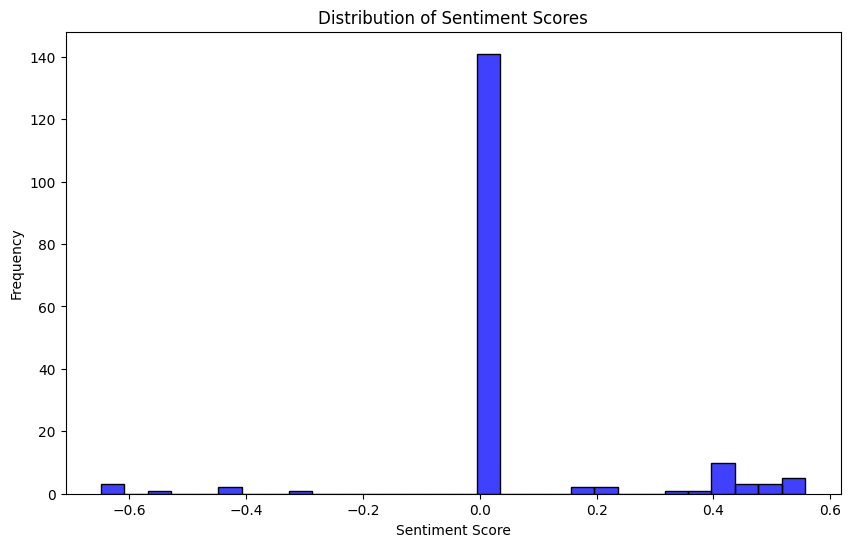

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(relations_df['sentiment_score'], bins=30, kde=False, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
'''
plt.figure(figsize=(12, 8))
sns.scatterplot(data=relations_df, x='noun', y='sentiment_score', hue='adjective')
plt.title('Sentiment Scores by Noun and Adjective')
plt.xlabel('Noun')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Adjective')
plt.show()


SyntaxError: incomplete input (<ipython-input-153-7b91428b0779>, line 1)